### Importowanie bibliotek

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D


### Generowanie zmyślonych danych do trenowanie

In [2]:
observations = 1000

xs = np.random.uniform(low = -10, high = 10, size=(observations, 1))
zs = np.random.uniform(-10, 10, (observations, 1))

inputs = np.column_stack((xs, zs))

print(inputs.shape)

(1000, 2)


### Stworzenie docelowych danych (dla modelu liniowego)
np. f(x,z) = 2*x - 3*z + 5 + szum

In [3]:
noise = np.random.uniform(-1,1,(observations,1))

targets = 2*xs - 3*zs + 5 + noise

print(targets.shape)

(1000, 1)


### Wyrysowanie danych

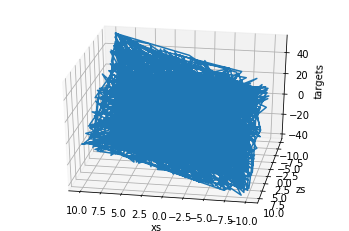

In [4]:
targets = targets.reshape(observations,)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xs,zs, targets)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('targets')
ax.view_init(azim=100)
plt.show()
targets = targets.reshape(observations,1)

### Tworzenie zmiennych

In [5]:
init_range = 0.1

weights = np.random.uniform(-init_range, init_range, size=(2,1))

biases = np.random.uniform(-init_range, init_range, size=1)

print(weights)
print(biases)

[[ 0.0145502 ]
 [-0.00231101]]
[-0.09218341]


### Ustawienie learning_rate

In [6]:
learning_rate = 0.02

### Trenowanie modelu

In [7]:
for i in range(100):
    outputs = np.dot(inputs, weights) + biases
    deltas = outputs - targets
    
    loss = np.sum(deltas ** 2)  / observations
    
    print(loss)
    
    deltas_scaled = deltas / observations
    
    weights = weights - learning_rate * np.dot(inputs.T, deltas_scaled)
    
    biases = biases - learning_rate * np.sum(deltas_scaled)

446.91126568800223
67.7597791881927
28.67443695173673
23.8450819478733
22.538577382552393
21.627050972276905
20.787153167917737
19.9839968723332
19.212760600243545
18.471831969706816
17.759983006293783
17.076068397809212
16.41899150798611
15.787699141036455
15.18117947457743
14.598460396330918
14.038607941463912
13.500724795149155
12.98394885431907
12.487451845906422
12.01043799931217
11.552142770968064
11.111831618948967
10.688798825670963
10.282366366788276
9.89188282447607
9.516722343357348
9.15628362740066
8.809988976180746
8.477283358957505
8.157633525089281
7.850527149354648
7.555472010812833
7.271995203886627
6.999642380403474
6.737977021379747
6.486579737381135
6.245047596337792
6.012993477736797
5.7900454521569555
5.575846185151408
5.37005236452266
5.172334150071996
4.982374644941461
4.79986938770103
4.624525864366895
4.4560630395687895
4.2942109061148654
4.138710052232232
3.9893112457894824
3.8457750348348823
3.7078713638099217
3.575379204823108
3.448086203393077
3.3257883380

### Sprawdzenie czy wagi i biases są poprawne
była funkcja f(x,z) = 2x - 3z + 5 + szum

In [8]:
print(weights, biases)

[[ 1.99439769]
 [-2.98969157]] [4.28013027]


### Narysowanie wejść i docelowych wartości

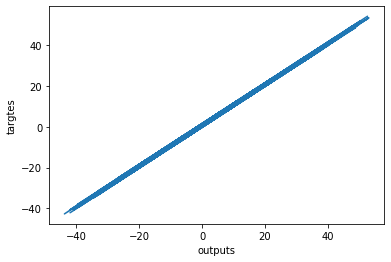

In [9]:

plt.plot(outputs, targets)
plt.xlabel('outputs')
plt.ylabel('targtes')
plt.show()